# CART (Classification & Regression Tree)

    Karar ağaçları makine öğrenmesi alanında çok büyük bir kullanım alanına sahiptir. Bu yöntemin daha gelişmiş yöntemleri, makine öğrenmesi yarışmalarında hali hazırda en çok kullanılan ve tahmin başarısı açısından en yüksek performanslı yöntemlerdir.  

Classification and Regression Trees başka bir deyişle CART Random Forest’ın temelini oluşturur. 

    Karar ağaçlarının gelişmiş yöntemleri, yapay öğrenme kapsamında, tahmin başarısı açısından en yüksek performanslı yöntemlerden biridir.

##### CART’ın **amacı** veri seti içerisindeki **karmaşık yapıları basit karar yapılarına dönüştürmektir.** Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.

<p align="center">
  <img src="grafikler/cart1.png" height=300 >
</p>

Yukarıda örnek olarak verilen Hitters Veri setinde Beyzbol oyuncularının istatistikleri ve maaşları belirli **Kurallara** göre CART yapısı ile betimlenmiştir. Deneyim yılı 4.5 yıldan az olan oyuncuların **maaş ortalamaları** (ortalamaların logaritması alınmış hali) 5.11 olarak belirtilmiştir. Deneyim yılı 4.5 yıla eşit veya fazla olanlar için başka bir değişken olan yapılan atış sayısı üzerinden farklı bir dallanma oluşturularak, 117.5 atıştan az atış yapanların maaş ortalaması 6, eşit veya fazla atış yapanların maaş ortalamaları ise logaritması alınmış şekilde 6.74 olarak ifade edilmiştir.


    Karar ağaçlarında Excel tablolarındaki filtrelemelere benzer bir yapı söz konusudur. Bir karar ağacı şemasında en tepede görünen değişken en çok etkide bulunduğundan ötürü en önemli değişkendir. 

Bu örnek için en tepedeki değişken deneyim yılı daha sonrasında ise atış sayısıdır.
    
    Karar ağaçlarındaki bağımsız değişkenlere açıklayıcı değişken veya Feature da denir.

<p align="center">
  <img src="grafikler/cart2.png" height=300 >
</p>

Karar ağaçları üzerindeki bağımsız değişkenleri bölen karar noktalarına **İç düğüm noktaları (Internal Nodes)** denir. Karar ağaçlarının uçlarındaki noktalara **Son düğüm noktaları (Terminal Nodes)** denir.

    Karar ağacı eksenler üzerinde de ifade edilebilir. Oluşturulan decision tree neticesinde, karar kuralları çıkarılır.

<p align="center">
  <img src="grafikler/cart3.png" height=300 >
</p>

Yukarıda sağdaki görsel gibi bir eksenler üzerinde ifade edilmiş bir grafik olsun, bu bizim aynı zamanda **karar ağacımız** olacaktır.

    Bu eksenler üzeriden çıkaracağımız karar kuralları sağdaki kod parçası gibi olacaktır. Daha da detaylı açıklamak istersek;

* Predictor A (Tahminci A) ≥ 1.7 kuralı verilmiş ve A tahmincisinin 1.7'den büyük değerleri için Bağımlı değişken olan Outcome değişkeninin ortalaması 5.6'a eşit verilmiştir.

* Ayriyeten Predictor A (Tahminci A) ≥ 1.7 durumu için ek bir kural ile Predictor B değişkeni için Predictor B ≥ 202.1 kuralı verilmiş. bu iki kuralın (iç düğüm noktaları) gerçeklenmesi neticesinde, Outcome değişkeninin ortalaması 1.3'e eşit olarak betimlenmiştir.

* Öteki tüm durumlarda (Yani Predictor A (Tahminci A) < 1.7 durumu için) Outcome değişkeninin ortalaması 2.5'a eşittir şeklinde tanımlanmıştır.

        Yukarıda bulunan sağdaki grafik için örnek verecek olursak; 5.6, 1.3 ve 2.5 çıktıları nasıl hesaplanmaktadır?

Elimizde aşağıdaki gibi bir veri seti olsun;

<p align="center">
  <img src="grafikler/cart4.png" width=300 >
</p>

Örneğin bağımsız değişkenlere bir filtreleme işlemi uygulasak; 

X_1 değişkeni (Predictor A) 1.7'den ve X_2 değişkeni (Predictor B) 202.1'den büyük olanları filtrelesek şöyle bir tablo elde etmiş oluruz;

<p align="center">
  <img src="grafikler/cart6.png" width=290 >
</p>

In [1]:
# Tablodaki bağımlı değişkenlerin ORTALAMASININ 1.3 olduğunu görüyoruz.

X_1 değişkeni (Predictor A) 1.7'den büyük ve X_2 değişkeni (Predictor B) 202.1'den küçük olanları filtrelesek şöyle bir tablo elde etmiş oluruz;

<p align="center">
  <img src="grafikler/cart7.png" width=290 >
</p>

In [2]:
# Tablodaki bağımlı değişkenlerin ORTALAMASININ 5.6 olduğunu görüyoruz.

X_1 değişkeni (Predictor A) 1.7'den küçük olanları filtrelesek şöyle bir tablo elde etmiş oluruz;

<p align="center">
  <img src="grafikler/cart5.png" width=290 >
</p>

In [3]:
# Tablodaki bağımlı değişkenlerin ORTALAMASININ 2.5 olduğunu görüyoruz.

**Sonuç olarak karar çıktıları bağımsız değişkenler filtrelendikten sonra oluşan verimizdeki bağımlı değişkenlerin ortalaması alınarak oluşturuluyormuş.**

    "Karar kuralları nasıl oluşturuldu da karar noktaları 1.7 ve 202.1 olarak belirlendi?" sorusunun cevabına bakalım.

Algoritmik bir şekilde belirli referans noktalarına göre hareket ederek ve optimizasyonlar yaparak, iç düğüm ve son düğüm noktaları belirlenir. Belirlenen düğüm noktalarına göre karar kuralları çıkarılır. 

Buradan hareketle, Ki-Kare (Chi-Square), GINI, Entropy (Information Gain), RSS (SSE), Reduction in Variance gibi bazı metrikler kullanılarak bu karar kuralları belirlenir.

Bir örnek olarak RSS *(SSE [Residual Sum of Squares, Sum of Square of Error veya Hata kareleri Toplamı])* fonksiyonunu ele alalım;

**Not: Hata kareleri toplamı fonksiyonuna Cost, Loss, objective vb. fonksiyonu da deniyordu.**

<p align="center">
  <img src="grafikler/cart8.png" height=200 >
</p>

Karar ağacı oluşturulurken karar kurallarının belirlendiği noktalar, RSS (SSE) değerinin minimum olduğu noktalardır. Karar ağacı bu noktalarda dallanmalar (bölgenlenmeler, kutulanmalar) yapılması sonucunda oluşturulur. Bu kapsamda Y_hat_(Rⱼ) tahmin değerlerindeki Rⱼ ifadesi bölgeleri temsil eder.



    Daha açıklayıcı bir örnekle durumu ifade edelim;

Elimizde aşağıdaki gibi bir veri seti olsun;

<p align="center">
  <img src="grafikler/cart8_8.png" height=400 >
</p>

1. Bu veri setinin bağımsız değişkenini 70'den bölelim;

<p align="center">
  <img src="grafikler/cart9.png" height=400 >
</p>

  * 70'ten böldükten sonra y_pred değerini hesaplayalım. (y_pred grup içerisindeki bağımlı değişkenlerin ortalamasıdır.)
  
  * Daha sonrasında hatalarımızı hesaplayalım.
  * Hatalarımızın karelerini aldıktan sonra bu hata karelerini toplayalım.
  * SSE 108.308 çıktı.

2. Bu veri setinin bağımsız değişkenini 73'ten bölelim ve yukarıdaki aşamaları burada da yapalım;

<p align="center">
  <img src="grafikler/cart10.png" height=400 >
</p>

    Hata kareleri toplamında bir azalma olduğunu görüyoruz.

3. Bu veri setinin bağımsız değişkenini 94'ten bölelim ve yukarıdaki aşamaları burada da yapalım;

<p align="center">
  <img src="grafikler/cart11.png" height=400 >
</p>

    Hata karelerinde daha da bir azalma olduğunu gözlemliyoruz.

4. Son olarak veri setinin bağımsız değişkenini 118'den bölelim ve yukarıdaki aşamaları burada da yapalım;

<p align="center">
  <img src="grafikler/cart12.png" height=400 >
</p>

    Hata karelerinde artış gözlemliyoruz.

Bu SSE'ler incelendiğinde; en az hatayı veren gözlemin 94 olduğunu görebiliriz.

<p align="center">
  <img src="grafikler/cart13.png" height=150 >
</p>

En az hatayı veriyi 94'ten bölünce aldığımız için ilk karar noktamız 94'tür. Bu şekilde birinci dallanma tamamlanmaktadır. Diğer dallanma noktalarını bulmak için ise 2'ye ayrılan verimizin her bir kısmında bu süreci devam ettiririz.

In [4]:
# Peki burada 1 değil de 10 değişken olsaydı ne olacaktı?

# Bu 10 değişkenin tamamına da metrekare değişkenine yaptığımız işlemi uygulayacak,
# bunun neticesinde en düşük hatayı veren değişken, en önemli değişken olacarak en tepede yer alacaktı.
# Bu önem düzeyine göre değişkenlerin dallanmaları gerçekleşiyor olacaktı.

Yukarıda diğer dallanma noktalarını bulmak için tek bir veri setinden parçalanarak oluşan 2 veri setinde de sürecin aynı şekilde (ana veri setindeki süreç gibi) devam edeceğini söylemiştik.

**"Peki karar ağacında kaç dal olacak, yoksa her bir gözleme kadar bir dal oluşturacak mıyız?"** soruları akıllara gelebilir. 

Bunlar modelimize vereceğimiz hiper parametreler olacak, modelimize dallanma sayısını veya son iki veya üç gözleme gelince daha fazla dallanma yapmaması gerektiğini hiper parametre ile vereceğiz. Yoksa modelimiz veriyi aşırı öğrenir, train veri setinde çok iyi sonuçlar ortaya çıkarsa da gerçek problem'e uygulanabilirliği olmayabilir.

Bu kısmın detayını hiper parametre optimizasyonu bölümünde göreceğiz. Lakin iki nokta bizim için önemlidir;

* Modelimizde ne kadar dallanma olacağı, (max dept)
* Oluşan dalda kalan gözlem sayısının ka olacağı. (min sample split)

Biz yukarıdaki örneğimizde 1 seviye aşağı inerek karar ağacını dallandırdık. 

In [5]:
################################################
# Decision Tree Classification: CART
################################################

# 1. Exploratory Data Analysis
# 2. Data Preprocessing & Feature Engineering
# 3. Modeling using CART
# 4. Hyperparameter Optimization with GridSearchCV
# 5. Final Model
# 6. Feature Importance
# 7. Analyzing Model Complexity with Learning Curves (BONUS)
# 8. Visualizing the Decision Tree
# 9. Extracting Decision Rules
# 10. Extracting Python/SQL/Excel Codes of Decision Rules
# 11. Prediction using Python Codes
# 12. Saving and Loading Model

In [6]:
# Kütüphanelerimizi import edelim;

import warnings
import joblib
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from skompiler import skompile
import graphviz

# Hata ve tablo görünüm ayarlarımızı yapalım;

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

warnings.simplefilter(action='ignore', category=Warning)

İlk iki başlığı bu ders kapsamında es geçiyor olacağız, geçmiş konu anlatımlarında detaylıca üzerinden geçmiştik.

In [7]:
################################################
# 1. Exploratory Data Analysis
################################################

################################################
# 2. Data Preprocessing & Feature Engineering
################################################

In [8]:
################################################
# 3. Modeling using CART
################################################


# Veri setini okutalım;
df = pd.read_csv("datasets/diabetes.csv")


# Bağımlı ve bağımsız değişkenlerimizi tanımlayalım;
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

# Modelimizi kuralım;
cart_model = DecisionTreeClassifier(random_state=1).fit(X, y)

In [9]:
# Confusion matrix için y_pred hesaplayalım;
y_pred = cart_model.predict(X)

# AUC için y_prob hesaplayalım;
y_prob = cart_model.predict_proba(X)[:, 1]

In [10]:
# Confusion matrix'imizi inceleyelim;
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



Yukarıya baktığımız zaman %100'lük bir tahmin etme başarımızın olduğunu görüyoruz. Lakin teorik olarak böyle bir çıktı mümkün değil. İyi model kurmanın bir gerekliliği olarak hataların raslantısal olması gerekmektedir. Yukarıda hata olmamakla birlikte, hatayı sayısal bir değer olarak görüp "0" olarak değerlendirecek olursak da, raslantısal olmadığı çok açıktır.

In [11]:
# AUC değerine bakalım;
roc_auc_score(y, y_prob)

1.0

        Model başarımızı bir doğrulayalım;

In [12]:
#####################
# Holdout Yöntemi ile Başarı Değerlendirme
#####################

# Veri setimizi ikiye bölelim;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)


# Train veri setinde modelimizi eğitelim;
cart_model = DecisionTreeClassifier(random_state=17).fit(X_train, y_train)

In [13]:
# Train setinin confusion matrix'ine ve AUC değerine bakalım;

y_pred = cart_model.predict(X_train)
y_prob = cart_model.predict_proba(X_train)[:, 1]
print(classification_report(y_train, y_pred))
roc_auc_score(y_train, y_prob)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       346
           1       1.00      1.00      1.00       191

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



1.0

Yine mükemmel bir tahminde bulunmuşuz gibi gözüküyor. :)

In [14]:
# Test setinin confusion matrix'ine ve AUC değerine bakalım;
y_pred = cart_model.predict(X_test)
y_prob = cart_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_prob)

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       154
           1       0.53      0.56      0.54        77

    accuracy                           0.69       231
   macro avg       0.65      0.66      0.65       231
weighted avg       0.69      0.69      0.69       231



0.6558441558441559

Model görmediği bir veride o kadar da iyi bir performans gösteremedi. Anlıyoruz ki modelimiz over fit olup, train data setini ezberlemiş.

In [15]:
#####################
# Cross Validation ile Başarı Değerlendirmek İstersek
#####################


# Modelimizi tekrardan kuralım;
cart_model = DecisionTreeClassifier(random_state=17).fit(X, y)


# cross_validate fonksiyonumuzu çalıştıralım;
cv_results = cross_validate(cart_model,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

In [16]:
# Test accuracy ortalamalarına bakalım;
cv_results['test_accuracy'].mean()

0.7058568882098294

In [17]:
# f1 skoru ortalamalarına bakalım;
cv_results['test_f1'].mean()

0.5710621194523633

In [18]:
# AUC değeri ortalamalarına bakalım;
cv_results['test_roc_auc'].mean()

0.6719440950384347

In [19]:
# Bir önceki modelin test setinin başarı metrikleri

#               precision    recall  f1-score   support

#            0       0.77      0.75      0.76       154
#            1       0.53      0.56      0.54        77

#     accuracy                           0.69       231
#    macro avg       0.65      0.66      0.65       231
# weighted avg       0.69      0.69      0.69       231

    Buradaki asıl kaygımız başarı değil, başarının doğruluğunu tespit etmektir.

    5 Katlı CV sonrasında modelimizin başarı metrikleri eğer ki hala bizim için yeterli değilse, bu başarı metriklerini arttırmak için;
        * Yeni gözlemler ekleyerek,
        * Yeni değişkenler ekleyerek,
        * Veri ön işleme işlemlerine dokunarak,
        * Hiper parametre optimizasyonu yaparak gerçekleştirbiliriz.

In [20]:
################################################
# 4. Hyperparameter Optimization with GridSearchCV
################################################

# Mevcut modelin hiper parametrelerine bakalım;
cart_model.get_params()

# Burada over-fit'in direk önüne geçebilecek "max_depth" ve "min_samples_split" olmak üzere,
# bizi ilgilendiren iki parametre bulunmaktadır.

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [21]:
# max_depth
# Ağacın maksimum derinliğidir. Yani kaç seviye yaprak oluşturulacağını ifade eder.
# "None" ise, tüm yapraklar saf olana kadar veya 
# tüm yapraklar min_samples_split örneklerinden daha az gözlem içerene kadar düğümler (karar noktaları) genişletilir.

# min_samples_split
# İç düğümü bölmek için gereken minimum gözlem sayısı

In [22]:
# Göndereceğimiz parametreleri bir sözlüğün içerisine kaydedelim;

cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}

In [23]:
# GridSearchCV ile hiperparametre değişikliklerini inceleyelim;

cart_best_grid = GridSearchCV(cart_model,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=1).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


    Verbose bize çıktı detayını gösterir.

In [24]:
cart_best_grid = GridSearchCV(cart_model,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=3).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END ..max_depth=1, min_samples_split=2;, score=0.682 total time=   0.0s
[CV 2/5] END ..max_depth=1, min_samples_split=2;, score=0.714 total time=   0.0s
[CV 4/5] END ..max_depth=1, min_samples_split=2;, score=0.752 total time=   0.0s
[CV 3/5] END ..max_depth=1, min_samples_split=2;, score=0.714 total time=   0.0s
[CV 5/5] END ..max_depth=1, min_samples_split=2;, score=0.752 total time=   0.0s
[CV 1/5] END ..max_depth=1, min_samples_split=3;, score=0.682 total time=   0.0s
[CV 2/5] END ..max_depth=1, min_samples_split=3;, score=0.714 total time=   0.0s
[CV 3/5] END ..max_depth=1, min_samples_split=3;, score=0.714 total time=   0.0s
[CV 4/5] END ..max_depth=1, min_samples_split=3;, score=0.752 total time=   0.0s
[CV 5/5] END ..max_depth=1, min_samples_split=3;, score=0.752 total time=   0.0s
[CV 1/5] END ..max_depth=1, min_samples_split=4;, score=0.682 total time=   0.0s
[CV 2/5] END ..max_depth=1, min_samples_split=

In [25]:
# En iyi parametreleri getirelim;

cart_best_grid.best_params_

{'max_depth': 5, 'min_samples_split': 4}

In [26]:
# En iyi parametrelere ait hata değerlerine bakacak olursak;

cart_best_grid.best_score_

# Peki hangi skor değerini getiriyor diye soracak olursak, "accuracy" skorunu getirdiğini söyleyebiliriz.

0.7500806383159324

In [27]:
cart_best_grid = GridSearchCV(cart_model,
                              cart_params,
                              scoring="f1",
                              cv=5,
                              n_jobs=-1,
                              verbose=1).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [28]:
# En iyi f1 skoru için belirlenen parametreleri getirelim;

cart_best_grid.best_params_

{'max_depth': 4, 'min_samples_split': 2}

In [29]:
# En iyi parametrelere ait f1 skoruna bakacak olursak;

cart_best_grid.best_score_

0.6395752751155839

In [30]:
cart_best_grid = GridSearchCV(cart_model,
                              cart_params,
                              scoring="roc_auc",
                              cv=5,
                              n_jobs=-1,
                              verbose=1).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [31]:
# En iyi f1 skoru için belirlenen parametreleri getirelim;

cart_best_grid.best_params_

{'max_depth': 5, 'min_samples_split': 19}

In [32]:
# En iyi parametrelere ait f1 skoruna bakacak olursak;

cart_best_grid.best_score_

0.8020768693221523

    Buradan çıkaracağımız sonuç ise istediğimiz model değerlendirme metriklerine göre hiper parametrelerin değişkenlik göstereceğidir.

In [33]:
# En iyi hiper parametrelere sahip model ile tahmin yapmak istersek;

# Bağımsız değişkenlerin içerisinden rasgele bir gözlem alalım;
random = X.sample(1, random_state=45)
random

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
195,5,158,84,41,210,39.4,0.395,29


Ağaç yöntemlerinde değişkenleri normalleştirmeye gerek yoktur !!!

In [34]:
# Tahminde bulunalım;

cart_best_grid.predict(random)

# Bu gözleme ait tahminimiz "1" oldu.

array([1])

    Burada tahmini cart_best_grid nesnesi üzerinden oluşturduk lakin her halükarda final modelin oluşturulmasını ısrarla tavsiye ediyoruz.

In [35]:
# Bu kısımda accuracy'ye göre modelimizde bir kez daha hiper parametre denemesi yapalım;

cart_best_grid = GridSearchCV(cart_model,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=1).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [36]:
################################################
# 5. Final Model
################################################

# Final modelimizi kuralım;
cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_, random_state=17).fit(X, y)

# Final modelin parametrelerine bakalım;
cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [37]:
# Bir diğer hiper parametre atama yöntemi ise;

cart_final = cart_model.set_params(**cart_best_grid.best_params_).fit(X, y)

# Bunun yukarıdaki işlemden farkı ise, yukarıda yeniden bir model kuruyoruz aslında,
# Lakin bu kod satırında ise daha önceden kurduğumuz model nesnesinin içerisine 
# yeniden bir hiper parametre gönderiyoruz.

    Peki neden bu farkı bilmeliyiz?

İleride yapacağımız işlemlerde hiper parametre optimizasyonu gibi işlemleri otomatize etmeyi göreceğiz. Bu sebeple burası bizim için önemli ve bilmemiz gereken bir farktır.

In [38]:
# Şimdi final model üzerinden 5 katlı bir cross validation yapalım;

cv_results = cross_validate(cart_final,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

In [39]:
# Final modelin test accuracy ortalamalarına bakalım;
cv_results['test_accuracy'].mean()

0.7500806383159324

In [40]:
# Final modelin f1 skoru ortalamalarına bakalım;
cv_results['test_f1'].mean()

0.614625004082526

In [41]:
# Final modelin AUC değeri ortalamalarına bakalım;
cv_results['test_roc_auc'].mean()

0.797796645702306

    Peki bu hiper parametre optimizasyonu işe yaradı mı?

Bunun için hiper parametre optimizasyonu yapmadan önceki model çıktılarını kıyaslayalım.

In [42]:
# cv_results['test_accuracy'].mean()
# 0.7058568882098294
# cv_results['test_f1'].mean()
# 0.5710621194523633
# cv_results['test_roc_auc'].mean()
# 0.6719440950384347

    Evet hiper parametre optimizasyonu işe yaramış gibi gözüküyor.
    Optimizasyon yaptıktan sonra;
    
            accuracy 0.70'ten 0.75'e çıkmış,
            f1 skoru 0.57'den 0.61'e çıkmış,
            AUC değeri ise 0.67'den 0.79'a çıkmıştır.

In [43]:
################################################
# 6. Feature Importance
################################################

# Hangi değişkenin modele ne kadar katkı sağladığını görmek istersek;
cart_final.feature_importances_

array([0.01129738, 0.49448119, 0.05065617, 0.        , 0.01497644,
       0.22221379, 0.06819923, 0.13817579])

Yukarıdaki çıktıyı anlamak biraz zor gibi geliyor. Aslında her bir değişkenin sırasıyla önem sırasını ifade ediyor. Lakin biz bunu daha güzel ifade etmek istiyoruz.

In [44]:
# Bu ifadeyi güzelleştirmek için bir fonksiyon tanımlayalım;

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

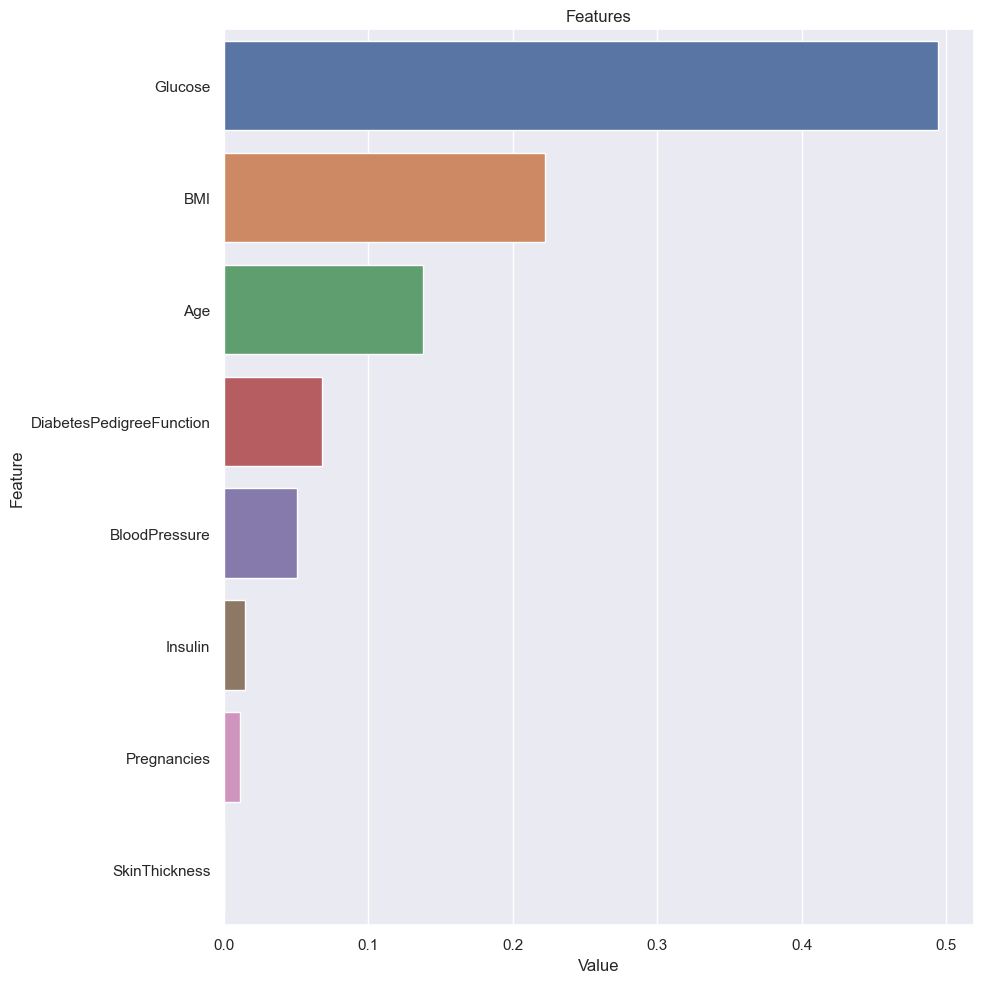

In [45]:
# modelimizin feature önem düzeylerine bakalım;
# "num=" argümanı ise en önemli kaç argümanı göstereceğini söylüyoruz.

plot_importance(cart_final, X)

In [46]:
################################################
# 7. Analyzing Model Complexity with Learning Curves (BONUS)
################################################

# Makine öğrenmesinin temel kavramlar kısmında model karmaşıklığından bahsetmiştik. Nedir bu model karmaşıklığı?
# Hatırlayalım...

    Model kurmak bağımlı ve bağımsız değişkenler arasındaki ilişkiyi ve bu ilişkinin anlamını çıkartmaktır. Bu durumda modelimizden veriyi ezberlemesini (veriyi aşırı öğrenmesini) değil, verinin yapısını öğrenmesini bekleriz.

    Aşırı öğrenme sorunu eğitim seti ve test setinin, model karmaşıklığı ve tahmin hatası çerçevesinde birlikte değerlendirilmesiyle tespit edilebilir. Eğitim seti ve Test setindeki hata değişimleri incelenir.

<p align="center">
  <img src="grafikler/asiri_ogrenme.png" height=250 >
</p>

İki hatanın birbirinden ayrılmaya başladığı nokta (çatallanmanın başladığı nokta) itibariyle aşırı öğrenme başlamıştır demektir. Aşırı öğrenmenin önüne nasıl geçilir sorusunun yanıtı bu noktada aranır. Bu noktada hiper parametreler üzerinde değişiklikler yaparak aşırı öğrenmenin önüne geçilir.

In [48]:
# Model karmaşıklığını inceleyebilmek için "validation_curve()" fonksiyonunu kullanacağız.
# "validation_curve()" fonksiyonu ile değiştirmek istediğimiz hiper parametreleri seçebiliriz.
# Seçtiğimiz hiper parametrelerin denenecek değerlerini ifade ederiz.
# Daha sonrasında istediğimiz bir başarı değerlendirme metriğine göre yorumlamasını yaparız.

train_score, test_score = validation_curve(cart_final, X, y,
                                           param_name="max_depth",
                                           param_range=range(1, 16),
                                           scoring="roc_auc",
                                           cv=10)

# "validation_curve()" fonksiyonunun içerisine ilk önce model nesnemizi gönderiyoruz.
# Daha sonrasında bağımsız ve bağımlı değişkenlerimizi gönderiyoruz.
# Bakılacak hiper parametreyi ifade ediyoruz.
# Hiper parametrenin alacağı değerleri söylüyoruz.
# Hangi başarı metriğine göre değerlendirme istediğimizi ifade ediyoruz.
# Kaç katlı bir cross validation yapılmasını istediğimizi ifade ediyoruz.

In [57]:
# Train skorlarımıza bakalım;

print(train_score, end="\n\n\n")
print(len(train_score))
print(len(train_score[0]))

# Aşağıda train skorlarımızı, "15" ve "10" sayılarını görüyoruz.
# Train skorun içerisinde 15 tane array bulunmaktadır. 
# Bu 15 array, yukarıda 15 adet hiper parametre denenmesini söylemiştik. Denenen hiper parametre sonuçlarını söylüyor.

# 10 sayısı ise "10 Katlı CV" istediğimiz iin her bir validasyon için olan ROC skorlarını ifade ediyor.

# Yani yukarıdan da hareketle; 1. array'in ilk değeri, max_depth = 1 ve 1. CV için hesaplanan AUC değeridir.

[[0.72320885 0.72306132 0.68555095 0.72350392 0.71698479 0.7011941
  0.66131397 0.71142923 0.71549128 0.71120294]
 [0.7987598  0.79874136 0.76659751 0.8000461  0.80217151 0.77901798
  0.76472568 0.79175657 0.80145087 0.79440771]
 [0.84255417 0.84810512 0.82195943 0.84559705 0.8434532  0.81859843
  0.82218534 0.83455048 0.8413315  0.84593664]
 [0.8834947  0.88264638 0.86355002 0.88926233 0.88226372 0.87104195
  0.86404334 0.87285846 0.87436639 0.87684114]
 [0.91531581 0.9138497  0.89976487 0.92513601 0.91451821 0.90380821
  0.88505302 0.90792531 0.91068411 0.90586318]
 [0.94068234 0.94559244 0.92840479 0.94609959 0.94535731 0.9309728
  0.91167819 0.93286307 0.94030303 0.93088154]
 [0.96760258 0.96744583 0.95147533 0.96842785 0.96832181 0.95850161
  0.93983864 0.96071    0.96145546 0.95757576]
 [0.97867681 0.98590595 0.97366067 0.98507146 0.98053481 0.9728308
  0.95985247 0.97829414 0.98042241 0.97642792]
 [0.99069617 0.99204703 0.98704472 0.99204703 0.98892577 0.98575841
  0.97496542 0.

In [58]:
# Test skorlarımıza bakalım;

print(test_score, end="\n\n\n")
print(len(test_score))
print(len(test_score[0]))

# Yukarıda aldığımız notlar test seti için de geçerlidir.

[[0.64777778 0.64925926 0.68074074 0.64481481 0.64222222 0.68481481
  0.63666667 0.75333333 0.71692308 0.75615385]
 [0.73407407 0.74888889 0.73555556 0.71592593 0.61703704 0.77777778
  0.70481481 0.82555556 0.74615385 0.80038462]
 [0.78407407 0.81333333 0.77222222 0.68296296 0.69296296 0.82925926
  0.79259259 0.85814815 0.72615385 0.80807692]
 [0.76481481 0.81148148 0.74962963 0.60740741 0.70888889 0.82111111
  0.83851852 0.87333333 0.77038462 0.81961538]
 [0.73444444 0.78666667 0.76333333 0.60037037 0.71925926 0.84814815
  0.80074074 0.88296296 0.75730769 0.81769231]
 [0.72814815 0.77962963 0.7462963  0.59481481 0.76259259 0.82740741
  0.81592593 0.83185185 0.76038462 0.77692308]
 [0.74222222 0.77888889 0.75222222 0.54296296 0.71851852 0.75444444
  0.82481481 0.8462963  0.67346154 0.76961538]
 [0.71481481 0.7137037  0.75222222 0.54148148 0.63851852 0.75259259
  0.81222222 0.74555556 0.68538462 0.78076923]
 [0.69185185 0.69851852 0.72296296 0.52407407 0.62185185 0.7262963
  0.82111111 

    Şimdi bu denenen değerlerin, AUC değerleri ortalamasın bakacağız. Zira 1 CV'ye ait AUC değeri bize pek de bir şey ifade etmemektedir.

In [62]:
mean_train_score = np.mean(train_score, axis=1)
mean_train_score

# Aşağıda 15 değer olduğunu görüyoruz, zira denenen 15 farklı değerin hatalarının ortalamasına bakıyoruz.
# Yukarıda da "axis=1" değeri girdik. Bunu bir aşağıda açıklayalım.

array([0.70729413, 0.78976751, 0.83642714, 0.87603684, 0.90819184,
       0.93528351, 0.96013549, 0.97716774, 0.98781586, 0.99359846,
       0.99646573, 0.99773044, 0.9981592 , 0.9983772 , 0.99838457])

##### Açıklama Başlangıcı

In [64]:
# Train skorumuzu df olarak görseydik aşağıdaki gibi görürdük;

pd.DataFrame(train_score)

,0,1,2,3,4,5,6,7,8,9
0,0.723209,0.723061,0.685551,0.723504,0.716985,0.701194,0.661314,0.711429,0.715491,0.711203
1,0.798760,0.798741,0.766598,0.800046,0.802172,0.779018,0.764726,0.791757,0.801451,0.794408
2,0.842554,0.848105,0.821959,0.845597,0.843453,0.818598,0.822185,0.834550,0.841331,0.845937
3,0.883495,0.882646,0.863550,0.889262,0.882264,0.871042,0.864043,0.872858,0.874366,0.876841
4,0.915316,0.913850,0.899765,0.925136,0.914518,0.903808,0.885053,0.907925,0.910684,0.905863
5,0.940682,0.945592,0.928405,0.946100,0.945357,0.930973,0.911678,0.932863,0.940303,0.930882
6,0.967603,0.967446,0.951475,0.968428,0.968322,0.958502,0.939839,0.960710,0.961455,0.957576
7,0.978677,0.985906,0.973661,0.985071,0.980535,0.972831,0.959852,0.978294,0.980422,0.976428
8,0.990696,0.992047,0.987045,0.992047,0.988926,0.985758,0.974965,0.988442,0.988338,0.989894
9,0.994970,0.995339,0.993439,0.994776,0.993006,0.992098,0.987842,0.994569,0.994307,0.995638


Satırlar 15 farklı hiper parametre değerini ifade ederken, sütunlar ise 10 katlı CV'den kaynaklanan AUC değerlerini ifade etmektedir. Bizim ise sütun **ortalamasına değil**, satır ortalamasına ihtiyacımız vardır.

<p align="center">
  <img src="grafikler/cart14.png" height=250 >
</p>

##### Açıklama Bitişi

In [65]:
# test skorları için de ortalamamızı alalım;

mean_test_score = np.mean(test_score, axis=1)

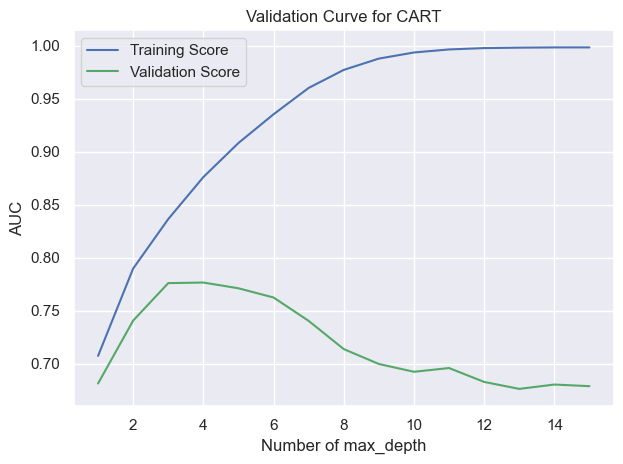

In [66]:
# Şimdi bu veriyi görselleştirelim;

plt.plot(range(1, 16), mean_train_score,
         label="Training Score", color='b')

plt.plot(range(1, 16), mean_test_score,
         label="Validation Score", color='g')

plt.title("Validation Curve for CART")
plt.xlabel("Number of max_depth")
plt.ylabel("AUC")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

# Yukarıda test skor'u, validation skor olarak isimlendirdik.
# Bazı kaynaklarda bu şekilde adlandırılıyor. Aşinalık olması açısından burada da böyle ifade etmek istedik.

Yukarıda görüldüğü üzere; "max_depth" 3'e kadar training ve validation skorlar birbirine paralel gidiyorken, sonrasında uzaklaşmaya başlıyorlar. Burada model train veri setini ezberlemeye başlarken, testte sorun yaşamaya başlıyor.

    Lakin burada akıllara başka sorular geliyor. Biz daha önceden hiper parametre olarak 'max_depth'i 5 ve 'min_samples_split'i ise 4 olarak seçmiştik. Burada ise "max_depth" 3'ten sonra modelimizi aşırı öğrenmeye başlıyor olarak gözükmektedir. Biz model kurduğumuzda bütün değişkenleri birlikte (eş anlı) olarak değerlendiriyoruz. Yani maksimum derinliği tek başına değiştirdiğimizde bu çıktıyı görüyoruz ama maksimum derinliği "3", "min_samples_split"i 5 yaptığımız değere burada bakmıyoruz. Yani model karmaşıklığını tek bir hiper parametre üzerinden değerlendiriyoruz.

In [67]:
# Bu işlem için bir fonksiyon tanımlayalım;

def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)

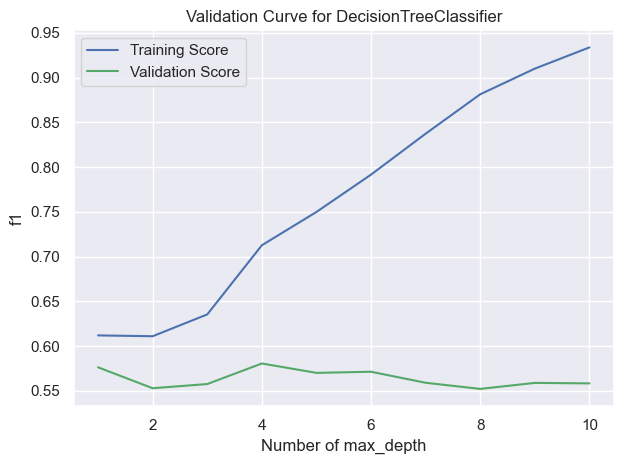

In [68]:
# Fonksiyonumuzu deneyelim;

val_curve_params(cart_final, X, y, "max_depth", range(1, 11), scoring="f1")

    F1 skoru açısından ise "max_depth" 4 olduktan sonra asıl kırılma başlıyor.

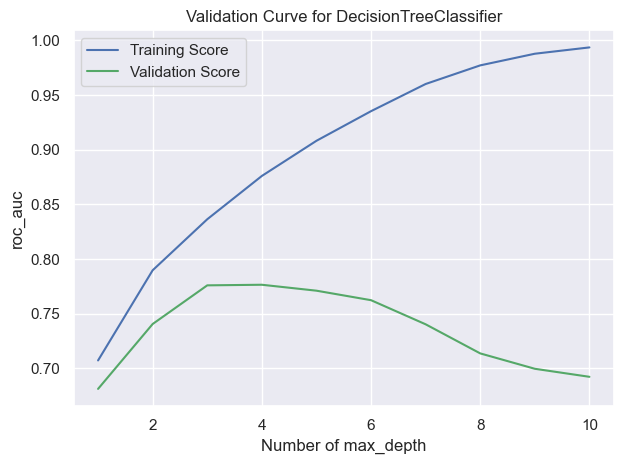

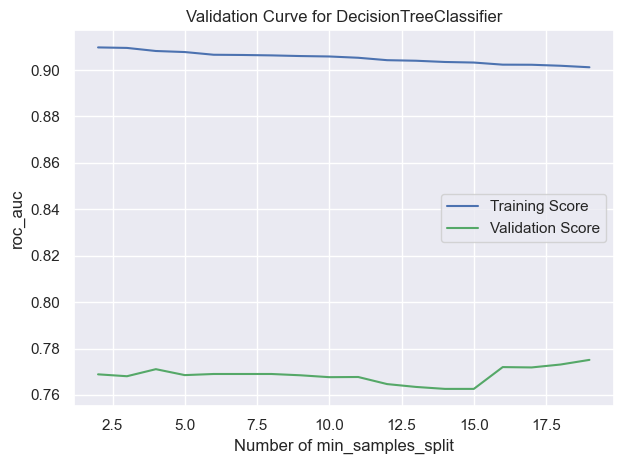

In [69]:
# İki hiper parametre için model karmaşıklığı incelemek istersek;

cart_val_params = [["max_depth", range(1, 11)], ["min_samples_split", range(2, 20)]]

for i in range(len(cart_val_params)):
    val_curve_params(cart_model, X, y, cart_val_params[i][0], cart_val_params[i][1])

Yukarıdaki grafiği zaten bir önceki işlemden tanıyoruz.

    II. Grafikte ise, ilgili dalda kaç değer kalmasını istediğimizi denedik.

In [76]:
################################################
# 8. Visualizing the Decision Tree
################################################

# Burası açıklaması uzun bir kısımdır. Burayı direk kabul edip geçmekte fayda var. :)
# Yine de araştırma yapmak isterseniz, aşağıdaki linkten faydalanabilir dokümantasyonu okuyabilirsiniz,
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

import graphviz

def tree_graph(model, col_names, file_name):
    tree_str = export_graphviz(model, feature_names=col_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(file_name)


In [78]:
tree_graph(model=cart_final, col_names=X.columns, file_name="grafikler/cart_final.png")

<p align="center">
  <img src="grafikler/cart_final.png" >
</p>

    Üzerinde çalıştığımız modelin görsel halidir.

In [79]:
################################################
# 9. Extracting Decision Rules
################################################

# Karar ağacının kurallarını çıkarmak istersek;

tree_rules = export_text(cart_final, feature_names=list(X.columns))
print(tree_rules)

# Sol taraftaki çizgiler takip edilerek dallanmalar izlenebilir.

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 45.40
|   |   |   |--- BMI <= 30.95
|   |   |   |   |--- Pregnancies <= 7.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pregnancies >  7.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- BMI >  30.95
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- BMI >  45.40
|   |   |   |--- BloodPressure <= 99.00
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  99.00
|   |   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- BMI <= 26.35
|   |   |   |--- BMI <= 9.65
|   |   |   |   |--- class: 1
|   |   |   |--- BMI >  9.65
|   |   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- Glucose <= 99.50
|   |   |   |   |--- Glucose <= 28.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Glucose >  28.50
|   |   |   |   |   |--- class: 0
|   |  

In [80]:
################################################
# 10. Extracting Python Codes of Decision Rules
################################################

# Karar kuralların PYTHON kodlarını çıkarmak istersek;

print(skompile(cart_final.predict).to('python/code'))

(((((0 if x[0] <= 7.5 else 1) if x[5] <= 30.949999809265137 else 0 if x[6] <=
    0.5005000084638596 else 0) if x[5] <= 45.39999961853027 else 1 if x[2] <=
    99.0 else 0) if x[7] <= 28.5 else (1 if x[5] <= 9.649999618530273 else 
    0) if x[5] <= 26.350000381469727 else (1 if x[1] <= 28.5 else 0) if x[1
    ] <= 99.5 else 0 if x[6] <= 0.5609999895095825 else 1) if x[1] <= 127.5
     else (((0 if x[5] <= 28.149999618530273 else 1) if x[4] <= 132.5 else 
    0) if x[1] <= 145.5 else 0 if x[7] <= 25.5 else 1 if x[7] <= 61.0 else 
    0) if x[5] <= 29.949999809265137 else ((1 if x[2] <= 61.0 else 0) if x[
    7] <= 30.5 else 1 if x[6] <= 0.4294999986886978 else 1) if x[1] <= 
    157.5 else (1 if x[6] <= 0.3004999905824661 else 1) if x[4] <= 629.5 else 0
    )



In [81]:
# Karar kuralların SQL kodlarını çıkarmak istersek;

print(skompile(cart_final.predict).to('sqlalchemy/sqlite'))

SELECT CASE WHEN (x2 <= 127.5) THEN CASE WHEN (x8 <= 28.5) THEN CASE WHEN (x6 <= 45.39999961853027) THEN CASE WHEN (x6 <= 30.949999809265137) THEN CASE WHEN (x1 <= 7.5) THEN 0 ELSE 1 END ELSE 0 END ELSE CASE WHEN (x3 <= 99.0) THEN 1 ELSE 0 END END ELSE CASE WHEN (x6 <= 26.350000381469727) THEN CASE WHEN (x6 <= 9.649999618530273) THEN 1 ELSE 0 END ELSE CASE WHEN (x2 <= 99.5) THEN CASE WHEN (x2 <= 28.5) THEN 1 ELSE 0 END ELSE CASE WHEN (x7 <= 0.5609999895095825) THEN 0 ELSE 1 END END END END ELSE CASE WHEN (x6 <= 29.949999809265137) THEN CASE WHEN (x2 <= 145.5) THEN CASE WHEN (x5 <= 132.5) THEN CASE WHEN (x6 <= 28.149999618530273) THEN 0 ELSE 1 END ELSE 0 END ELSE CASE WHEN (x8 <= 25.5) THEN 0 ELSE CASE WHEN (x8 <= 61.0) THEN 1 ELSE 0 END END END ELSE CASE WHEN (x2 <= 157.5) THEN CASE WHEN (x8 <= 30.5) THEN CASE WHEN (x3 <= 61.0) THEN 1 ELSE 0 END ELSE 1 END ELSE CASE WHEN (x5 <= 629.5) THEN 1 ELSE 0 END END END END AS y 
FROM data


In [82]:
# Karar kuralların EXCEL formüllerini çıkarmak istersek;

print(skompile(cart_final.predict).to('excel'))

A1=IF((x2<=127.5),IF((x ...418 chars skipped... ((x5<=629.5),1,0))))


    Biz yukarda modelimizi oluşturduk lakin, daha sonrasında bu modeli canlı bir sisteme entegre etmek isteyebiliriz. Bu sebeple bu kodlara ihtiyacımız olabilir. Bu kodları çıkarmak istersek yukarıdaki kodları çalıştırırız.

In [84]:
# sklearn '0.23.1' versiyonu ile de yapılabilir. Yukarıda bir hata alma ihtimaline karşın bundan bahsediyoruz.
# pip install scikit-learn==0.23.1 ile bu version'u install edebilirsiniz.

# Eğer ki biz kendi versiyonumuzu görmek istersek.

import sklearn
sklearn.__version__

'1.0.2'

In [85]:
################################################
# 11. Prediction using Python Codes
################################################

# Yukarıdaki pyhon kodunu fonksiyon içerisine tanımlarsak;

def predict_with_rules(x):
    return ((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6864999830722809 else
        0) if x[0] <= 7.5 else 1) if x[5] <= 30.949999809265137 else ((1 if x[5
        ] <= 32.45000076293945 else 1 if x[3] <= 10.5 else 0) if x[2] <= 53.0 else
        ((0 if x[1] <= 111.5 else 0 if x[2] <= 72.0 else 1 if x[3] <= 31.0 else
        0) if x[2] <= 82.5 else 1) if x[4] <= 36.5 else 0) if x[6] <=
        0.5005000084638596 else (0 if x[1] <= 88.5 else (((0 if x[0] <= 1.0 else
        1) if x[1] <= 98.5 else 1) if x[6] <= 0.9269999861717224 else 0) if x[1
        ] <= 116.0 else 0 if x[4] <= 166.0 else 1) if x[2] <= 69.0 else ((0 if
        x[2] <= 79.0 else 0 if x[1] <= 104.5 else 1) if x[3] <= 5.5 else 0) if
        x[6] <= 1.098000019788742 else 1) if x[5] <= 45.39999961853027 else 0 if
        x[7] <= 22.5 else 1) if x[7] <= 28.5 else (1 if x[5] <=
        9.649999618530273 else 0) if x[5] <= 26.350000381469727 else (1 if x[1] <=
        28.5 else ((0 if x[0] <= 11.5 else 1 if x[5] <= 31.25 else 0) if x[1] <=
        94.5 else (1 if x[5] <= 36.19999885559082 else 0) if x[1] <= 97.5 else
        0) if x[6] <= 0.7960000038146973 else 0 if x[0] <= 3.0 else (1 if x[6] <=
        0.9614999890327454 else 0) if x[3] <= 20.0 else 1) if x[1] <= 99.5 else
        ((1 if x[5] <= 27.649999618530273 else 0 if x[0] <= 5.5 else (((1 if x[
        0] <= 7.0 else 0) if x[1] <= 103.5 else 0) if x[1] <= 118.5 else 1) if
        x[0] <= 9.0 else 0) if x[6] <= 0.19999999552965164 else ((0 if x[5] <=
        36.14999961853027 else 1) if x[1] <= 113.0 else 1) if x[0] <= 1.5 else
        (1 if x[6] <= 0.3620000034570694 else 1 if x[5] <= 30.050000190734863 else
        0) if x[2] <= 67.0 else (((0 if x[6] <= 0.2524999976158142 else 1) if x
        [1] <= 120.0 else 1 if x[6] <= 0.23899999260902405 else 1 if x[7] <=
        30.5 else 0) if x[2] <= 83.0 else 0) if x[5] <= 34.45000076293945 else
        1 if x[1] <= 101.0 else 0 if x[5] <= 43.10000038146973 else 1) if x[6] <=
        0.5609999895095825 else ((0 if x[7] <= 34.5 else 1 if x[5] <=
        33.14999961853027 else 0) if x[4] <= 120.5 else (1 if x[3] <= 47.5 else
        0) if x[4] <= 225.0 else 0) if x[0] <= 6.5 else 1) if x[1] <= 127.5 else
        (((((1 if x[1] <= 129.5 else ((1 if x[6] <= 0.5444999933242798 else 0) if
        x[2] <= 56.0 else 0) if x[2] <= 71.0 else 1) if x[2] <= 73.0 else 0) if
        x[5] <= 28.149999618530273 else (1 if x[1] <= 135.0 else 0) if x[3] <=
        21.0 else 1) if x[4] <= 132.5 else 0) if x[1] <= 145.5 else 0 if x[7] <=
        25.5 else ((0 if x[1] <= 151.0 else 1) if x[5] <= 27.09999942779541 else
        ((1 if x[0] <= 6.5 else 0) if x[6] <= 0.3974999934434891 else 0) if x[2
        ] <= 82.0 else 0) if x[7] <= 61.0 else 0) if x[5] <= 29.949999809265137
         else ((1 if x[2] <= 61.0 else (((((0 if x[6] <= 0.18299999833106995 else
        1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else 0) if x[2] <=
        73.0 else 0) if x[0] <= 4.5 else 1 if x[6] <= 0.6169999837875366 else 0
        ) if x[6] <= 1.1414999961853027 else 1) if x[5] <= 41.79999923706055 else
        1 if x[6] <= 0.37299999594688416 else 1 if x[1] <= 142.5 else 0) if x[7
        ] <= 30.5 else (((1 if x[6] <= 0.13649999350309372 else 0 if x[5] <=
        32.45000076293945 else 1 if x[5] <= 33.05000114440918 else (0 if x[6] <=
        0.25599999725818634 else (0 if x[1] <= 130.5 else 1) if x[0] <= 8.5 else
        0) if x[0] <= 13.5 else 1) if x[2] <= 92.0 else 1) if x[5] <=
        45.54999923706055 else 1) if x[6] <= 0.4294999986886978 else (1 if x[5] <=
        40.05000114440918 else 0 if x[5] <= 40.89999961853027 else 1) if x[4] <=
        333.5 else 1 if x[2] <= 64.0 else 0) if x[1] <= 157.5 else ((((1 if x[7
        ] <= 25.5 else 0 if x[4] <= 87.5 else 1 if x[5] <= 45.60000038146973 else
        0) if x[7] <= 37.5 else 1 if x[7] <= 56.5 else 0 if x[6] <=
        0.22100000083446503 else 1) if x[6] <= 0.28849999606609344 else 0) if x
        [6] <= 0.3004999905824661 else 1 if x[7] <= 44.0 else (0 if x[7] <=
        51.0 else 1 if x[6] <= 1.1565000414848328 else 0) if x[0] <= 6.5 else 1
        ) if x[4] <= 629.5 else 1 if x[6] <= 0.4124999940395355 else 0)

In [86]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')

In [87]:
x = [12, 13, 20, 23, 4, 55, 12, 7]

predict_with_rules(x)

# Tahmin sonucu diyabet değildir çıktı.

0

In [88]:
x = [6, 148, 70, 35, 0, 30, 0.62, 50]

predict_with_rules(x)

# Tahmin sonucu diyabettir çıktı.

1

In [89]:
################################################
# 12. Saving and Loading Model
################################################

# Bu bölümde makine ööğrenmesi modellerini kaydetme ve kaydedilen modelleri çağırma işlemi gerçekleştireceğiz.
# Burada oluşturduğumuz model nesnesi saklayarak, 
# daha sonrasında saklamış olduğumuz model nesnesini çağırarak tahminde bulunmak istiyoruz.

joblib.dump(cart_final, "cart_final.pkl")

# Yukardaki kodu çalıştırdığımızda içinde bulundumuz dizine bir pkl dosyası oluşturur.

['cart_final.pkl']

In [90]:
# Şimdi dizinden çağıralım bu modeli;

cart_model_from_disc = joblib.load("cart_final.pkl")

In [91]:
x = [12, 13, 20, 23, 4, 55, 12, 7]

# Şimdi yukarıdaki gözlem ile tahminde bulunallım;

cart_model_from_disc.predict(pd.DataFrame(x).T)

# Modelim diyabettir diye tahmin etti.

array([1])

Buradaki çabalarımız sonucundad bir model geliştirdik. Bu modeli;

* bir başkasına gönderebilir,
* bir sunucuda saklayabiliriz.

Bir şekilde bu modele gözlem sorduğumuzda bize model sonucunda bir yanıt döner.